# Neural Style Transfer
One of the most exciting and fun ideas in computer vision is style transfer, which is simply taking an original images (aka content image) and applying the artistic style of another image (style image) to create a new and visually interesting result (generated image).
We'll see how we can create a code able to perform this task, and we 'll also give you an intuition about the math empowring it.

##  Importing essential libraries

In [6]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 
import PIL.Image
import time

## Transfer learning 
In the field of computer vision, a commun useful technique is to use somme powerful model that someone else has implemented and use it for your own task. Here's an example that illustrates the process:
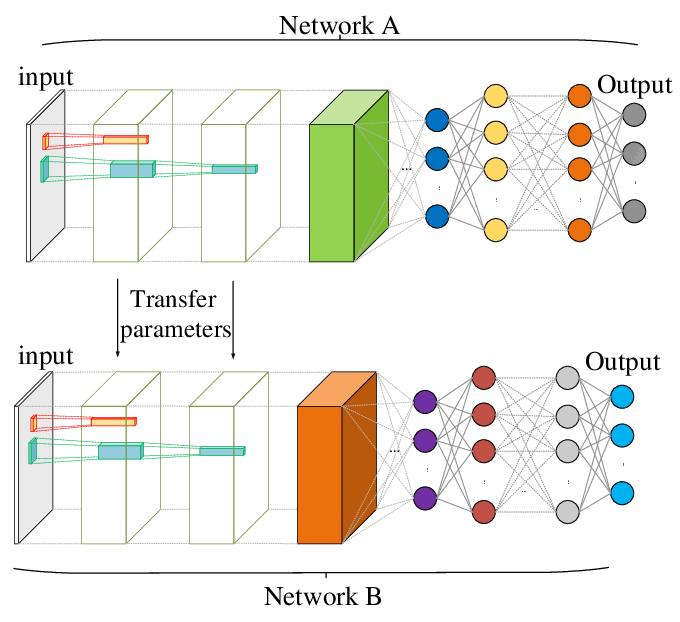

For our case we're going to use VGG-19, since it has 19 layers and has been trained on a large dataset of images so its shallow layers have already learned basic features, and its deep layers have learned complex high level features and luckly that what we exactly need. 
Before that we have to define some functions that'll enable us to process these images so that they are a valid input into our model.  

### Image processing
The following functions is going to read the content of the image in a tensor-way so that we can use it directly through the next coming functions. 
These comming functions are availabe in the Tensorflow tutorial of style-transfer: https://www.tensorflow.org/tutorials/generative/style_transfer

In [7]:
def load_img(img_path):
    #This first step gonna make us read the file and convert it into a tensor with normalized values
    max_dim = 512
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    #Specifying the scaling value
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    #Resizing the input image
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    #This is going to add the batch dimension
    img = img[tf.newaxis, :] #Tensor with shape = (1, height, width, channels)
    return img

In [8]:
def imshow(image, title): 
    #Simple function to display an image, image here should be either a numpy array or tf tensor that can be handled by matplotlib
    image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)

Let's test these two functions:

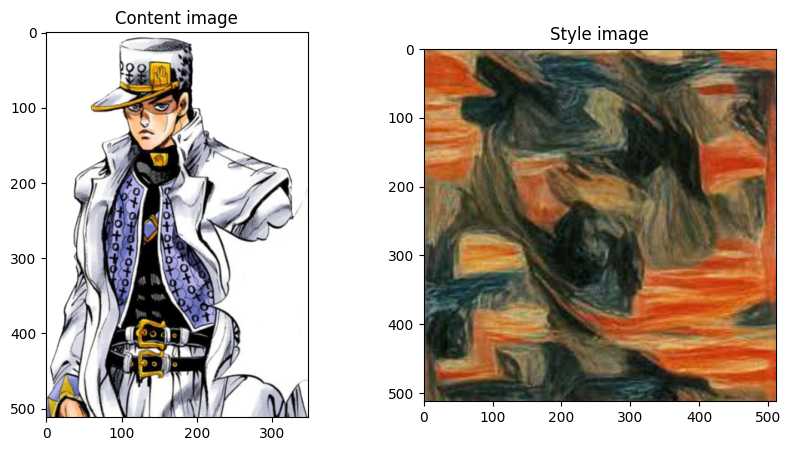

In [9]:
plt.figure(figsize=(10,5))
Cimage_path = "./Content_images/Cimage1.png"
loaded_Cimage = load_img(Cimage_path)
Simage_path = "./Style_images/Simage2.png"
loaded_Simage = load_img(Simage_path)
# Display the content image
plt.subplot(1, 2, 1)
imshow(loaded_Cimage, "Content image")
plt.subplot(1, 2, 2)
imshow(loaded_Simage, "Style image")

In [10]:
#This loads the vgg19 model excluding the last layers (fully connected layers at the end of the model)
vgg19_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False)
vgg19_model.trainable = False 